<a href="https://colab.research.google.com/github/atik81/datascience_sprint2-titanic/blob/main/week_ipynb_txt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#K-Nearest Neighbour
K-NN or K Nearest Neighbour is a easy to understand but one of the powerful and topmost machine learning algorithm. We will mainly be exploring this technique as Classification approach in this module

#Scikit-Learn Library:


- This is one of the popular and powerful libraries in Python used for predictive Analysis
-Open Source, Accessible and Reusable in various ways
-Various **Popular example Datasets** are available within this library for practicing different **Supervised Learning Techniques, such as, Regression and Classification**
- Scikit-Learn is built on **NumPy** , **SciPy** and **Matplotlib**, which you are already familiarized with

**Goal for this notyebook:**The purpose of this notebook is to demonstrate a straightforward example of a Python investigation of the Titanic accident that makes use of all available PyData functions. This article is intended for people who are interested in the field or are already working there and want to see an illustration of a Python-based analysis.

# The titanic dataset

The Iris flower dataset is a classic dataset used to identify three flower species based on features describing their [sepals](https://en.wikipedia.org/wiki/Sepalhttps://) and [petals](https://en.wikipedia.org/wiki/Petal). Let's load it first and print its description.

Overview:The procedures I used to make predictions on the surviving column are detailed in the following Jupyter notebook. This issue is categorised as a supervised learning problem because a goal column or variable is present. ** Steps:**

bringing in the required libraries. (Numerical, Pandas, Matplotlib, and Seaborn). reading data in. Visualisation and Data Exploration. Engineering of features. Building a prediction model (any machine learning model in guided learning) incorporating specialised data into the forecasting model. Using test results to make predictions. 


**Dependencies**:

*   install-pandas conda
*   install numpy with conda


*   install scikit-learn and matplotlib with conda

**Libraries importing**





In [9]:
import numpy as np
import pandas as pd
from sklearn import datasets
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('train.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Data exploration and visualization**

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:

train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


checking null **values**

In [13]:
train.isnull().head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False


Plotting the null values on a heatmap for better visualization


<Axes: >

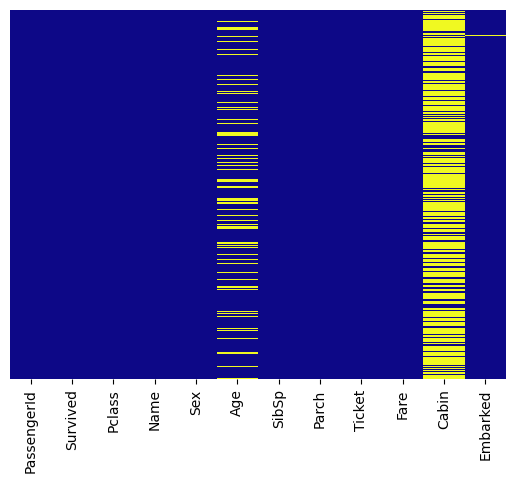

In [14]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
# every yellow line means missing data 

1. The Age and Cabin columns lack information.
2. Compared to Cabin, the Age column contains considerably less missing values.

<Axes: xlabel='Survived', ylabel='count'>

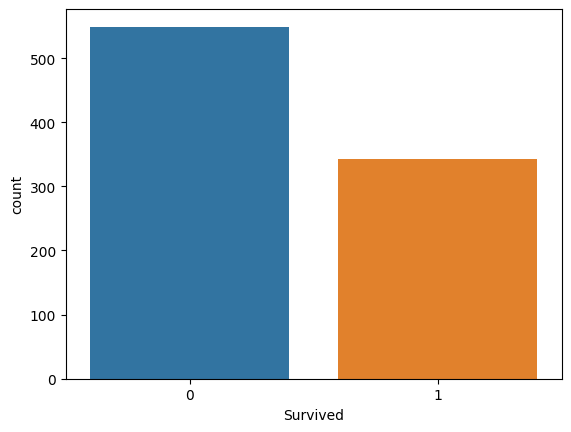

In [15]:
# First of all lets plot who survived and who didn't
sns.countplot(x = 'Survived', data = train)
# So about 580 didn't survive 
# And 320 survived

Dataset has a greater number rows with survived label as 0
About 580+ classify as 0
And 320 as 1

<Axes: xlabel='Survived', ylabel='count'>

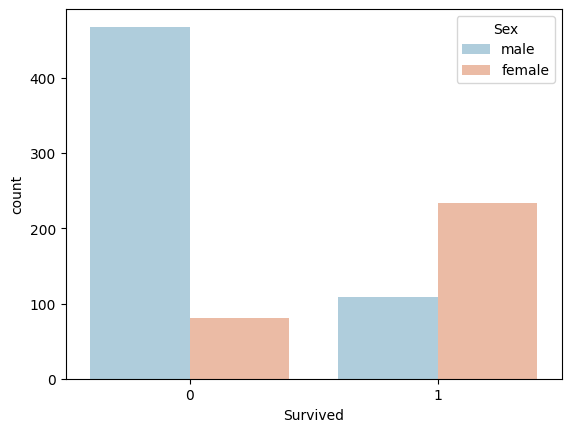

In [16]:
# Lets look at survived with a hue of gender
sns.countplot(x = 'Survived', data = train, hue = 'Sex', palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

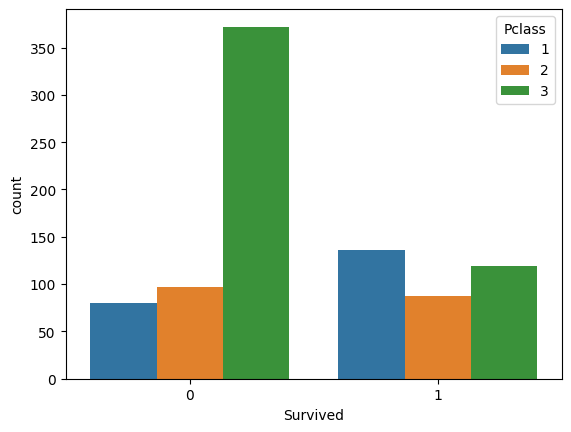

In [17]:
# Lets look at survived with a hue of Pasenger class
sns.countplot(x = 'Survived', data = train, hue = 'Pclass')

In [19]:
# Lets get an idea about the age of people in the data set
#sns.distplot(train['Age'].dropna(), kde= False, bins = 30)

<Axes: xlabel='SibSp', ylabel='count'>

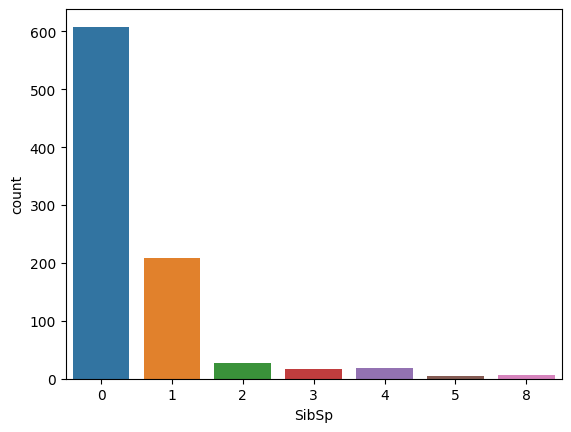

In [20]:
sns.countplot(x = 'SibSp', data = train)
# By looking at this plot, most people on board neither had  siblings / spouse

In [21]:
# Another column which we haven't explored yet is the fare column
train['Fare'].mean()

32.204207968574636

<Axes: >

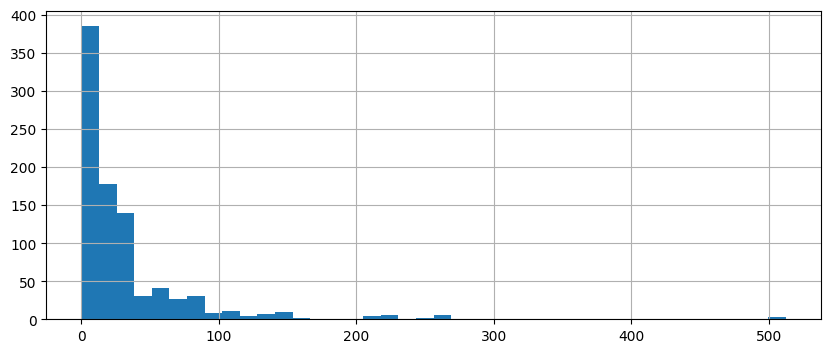

In [22]:
train['Fare'].hist( bins = 40, figsize = (10,4))
# most of the distribution is between 0 and 100 

<Axes: xlabel='Pclass', ylabel='Age'>

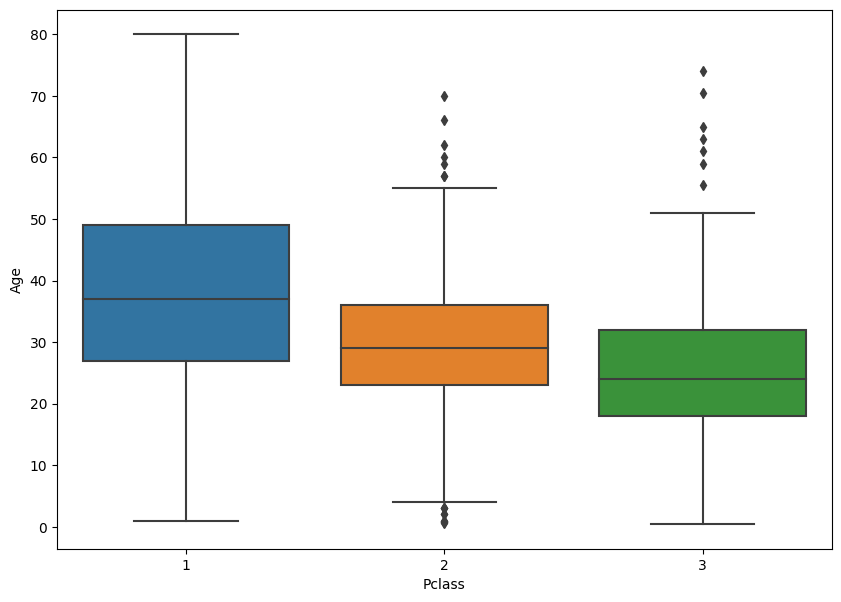

In [23]:
plt.figure(figsize = (10,7))
sns.boxplot(x = 'Pclass', y = 'Age', data = train)
# The figure shows that the Passengers in class 1 have older people 
# And younger people in lower Pclass

In [24]:
# Filling in null age values
def substitution(columns):
    Age = columns[0]
    Pclass = columns[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 36         # approx mean value from blue box
        elif Pclass == 2:
            return 29        # approx mean value from orange box
        else:
            return 23         # approx mean value from green box  
    else:
        return Age           # is not null

In [25]:
train['Age'] = train[['Age', 'Pclass']].apply(substitution, axis = 1)

<Axes: >

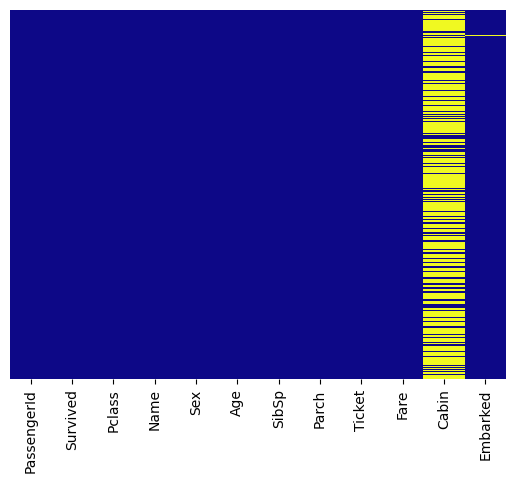

In [26]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
# no more missing values in Age 

<ipython-input-27-926b6e4dd6f3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot= True)


<Axes: >

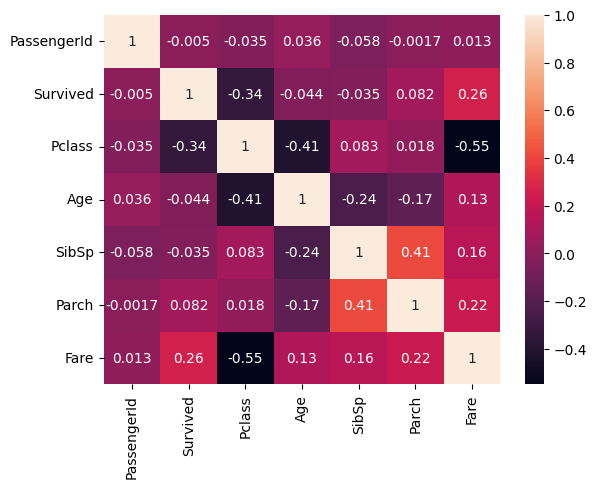

In [27]:
sns.heatmap(train.corr(), annot= True)
# Checking for correlation between columns

In [28]:
train.drop('Cabin',axis=1,inplace=True)
# there are so many missing columns in cabin
# that it seems right to drop it


In [29]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

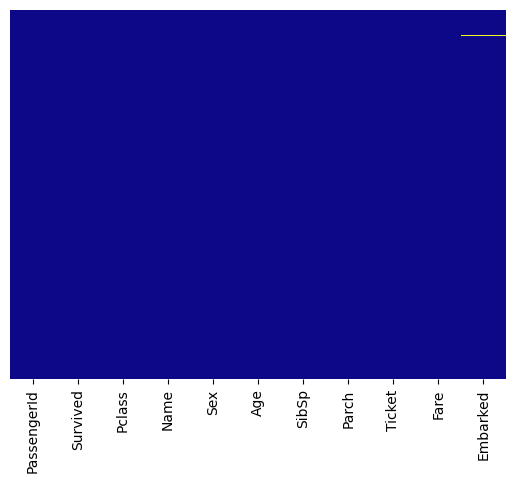

In [30]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='plasma')
# Final check for null values

In [31]:
pd.get_dummies(train['Sex']).head()
# we need to convert the sex column
# otherwise the machine learning alogorithm won't be able process the data

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [32]:
pd.get_dummies(train['Sex'], drop_first= True).head()
# now you can not feed both these columns as male and female are opposite
# and it will mess up the machine learning algorthim

,male
0,1
1,0
2,0
3,0
4,1


In [34]:
sex = pd.get_dummies(train['Sex'], drop_first= True)


In [35]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
# same process with Embarked column


In [36]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [37]:
# Since Pclass is also a categorical column
pclass = pd.get_dummies(train['Pclass'],drop_first=True)


In [38]:
train = pd.concat([train, sex, embark, pclass], axis = 1)

In [39]:
train.head()
# now, we don't need sex, embarked, plcass column because we have encoded them.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1,0,1


In [40]:
train.drop(['Sex','Embarked','Name','Ticket', 'Pclass'],axis=1,inplace=True)
# dropping columns which we are not going to use

In [41]:
train.head()
# looks perfect for our machine learning algorithm
# all data is numeric

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [61]:
# Features
X = train.drop('Survived', axis = 1)

# Target variable
y = train['Survived']

In [65]:
from sklearn.linear_model import LogisticRegression
# Supervised learning 

In [66]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Define your input features X and target variable y

# Provide the correct file path
file_path = '../input/train.csv'

# Read the data
train = pd.read_csv(file_path)

model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X, y)


FileNotFoundError: ignored

In [60]:
test = pd.read_csv('../input/test.csv')

FileNotFoundError: ignored

In [50]:
#test.columns

NameError: ignored

In [ ]:
#test.info()

In [ ]:
test['Age'] = test[['Age', 'Pclass']].apply(substitution, axis = 1)

In [ ]:
# Preparing test data according to the model
sex = pd.get_dummies(test['Sex'], drop_first= True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
pclass = pd.get_dummies(test['Pclass'],drop_first=True)

test = pd.concat([test, sex, embark, pclass], axis = 1)

test.drop(['Sex','Embarked','Name','Ticket', 'Pclass', 'Cabin'],axis=1,inplace=

In [ ]:
test.columns

In [ ]:
# Checking for null values in test
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [ ]:
test.info()

In [ ]:
test.fillna(value=test['Fare'].mean(), inplace= True)

In [ ]:
predictions = model.predict(test)

In [ ]:
d = {'PassengerId': test['PassengerId'], 'Survived': predictions}
result = pd.DataFrame(d)

In [ ]:
result.to_csv('submission.csv', index= False)

In [ ]:
result.head()

# K-NN classifiers

K-NN algorithm is an instance-based method that assigns a new sample to the **majotiry class** amongst the k closest training samples. From a statistical point of view, we can see K-NN as a method that creates **posterior probabilities** by identifying the closest training samples and obtaining the fraction of samples belonging to each class.

We could easily implement kNN ourselves, however we will use the implementation provided by the [scikit-learn](https://scikit-learn.org/stable/) library.  **Scikit library** is the most important Python library for machine learning and also a good place to learn and try new machine learning methods. 

In the cell below we will create several kNN classifiers for different values of k, will show the resulting decision regions and finally will obtain their validation accuracy. Note that k shouldn't be seen as a parameter of our model, but rather as a **hyperparameter**. In machine learning parameters are adjusted (for instance the intercept and slope of a straight line), while hyperparameters define families of models that behave very differently. 

The kNN algorithm is a strange one, in that there are **no parameters to adjust** and there is one hyperparameter.